In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Exploring and Understanding the Data

In [2]:
# Load the data
df= pd.read_csv(r"C:\Users\pullakandamtejaswini\OneDrive\Desktop\Amazon Sales data.csv")

In [3]:
# Display the first few rows of the data
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
# Shape of the dataset

df.shape

# Here, the dataframe_Amazon_Sales_data dataset contains 100 rows and 14 columns.

(100, 14)

#### Data Cleaning

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Display data types
data_types = df.dtypes

missing_values, data_types

(Region            0
 Country           0
 Item Type         0
 Sales Channel     0
 Order Priority    0
 Order Date        0
 Order ID          0
 Ship Date         0
 Units Sold        0
 Unit Price        0
 Unit Cost         0
 Total Revenue     0
 Total Cost        0
 Total Profit      0
 dtype: int64,
 Region             object
 Country            object
 Item Type          object
 Sales Channel      object
 Order Priority     object
 Order Date         object
 Order ID            int64
 Ship Date          object
 Units Sold          int64
 Unit Price        float64
 Unit Cost         float64
 Total Revenue     float64
 Total Cost        float64
 Total Profit      float64
 dtype: object)

In [7]:
# Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Confirm data types
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

#### Sales Analysis by Region

In [8]:
# Group by Region and calculate total revenue, total cost, and total profit
region_sales = df.groupby('Region')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

region_sales

,Region,Total Revenue,Total Cost,Total Profit
0,Asia,21347091.02,15233245.15,6113845.87
1,Australia and Oceania,14094265.13,9372105.10,4722160.03
2,Central America and the Caribbean,9170385.49,6323477.64,2846907.85
3,Europe,33368932.11,22285993.48,11082938.63
4,Middle East and North Africa,14052706.58,8291514.72,5761191.86
5,North America,5643356.55,4185413.79,1457942.76
6,Sub-Saharan Africa,39672031.43,27488820.03,12183211.40


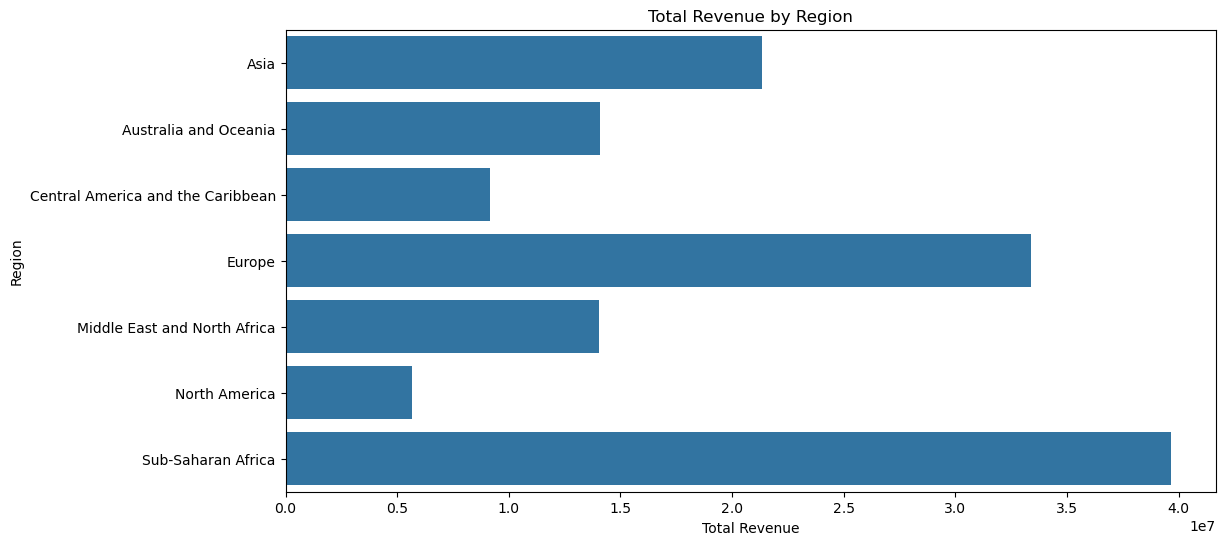

In [9]:
# Group by Region and calculate total revenue, total cost, and total profit
region_sales = df.groupby('Region')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

# Plotting Total Revenue by Region
plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales, x='Total Revenue', y='Region')
plt.title('Total Revenue by Region')
plt.xlabel('Total Revenue')
plt.ylabel('Region')
plt.show()

#### Sales Channel Analysis (Online vs Offline)

In [10]:
# Group by Sales Channel and calculate total revenue, total cost, and total profit
sales_channel_analysis = df.groupby('Sales Channel')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

# Display the result
(sales_channel_analysis)

,Sales Channel,Total Revenue,Total Cost,Total Profit
0,Offline,79094809.20,54174082.53,24920726.67
1,Online,58253959.11,39006487.38,19247471.73


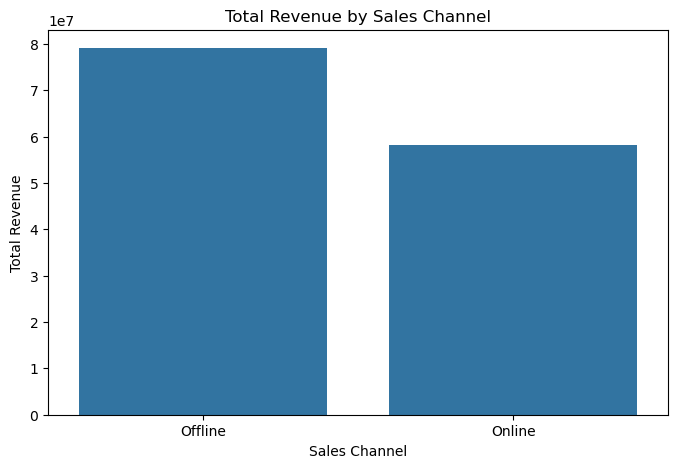

In [11]:
# Group by Sales Channel and calculate total revenue, total cost, and total profit
sales_channel_analysis =df.groupby('Sales Channel')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

# Plotting Total Revenue by Sales Channel
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_channel_analysis, x='Sales Channel', y='Total Revenue')
plt.title('Total Revenue by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.show()

#### Top Countries by Total Revenue

In [12]:
# Group by Country and calculate total revenue
country_sales = df.groupby('Country')['Total Revenue'].sum().reset_index().sort_values(by='Total Revenue', ascending=False)

# Display the top 10 countries by total revenue
(country_sales.head(10))

,Country,Total Revenue
24,Honduras,6336545.48
46,Myanmar,6161257.90
16,Djibouti,6052890.86
72,Turkmenistan,5822036.20
41,Mexico,5643356.55
71,The Gambia,5449517.95
35,Lithuania,5396577.27
56,Rwanda,5253769.42
4,Azerbaijan,4478800.21
7,Brunei,4368316.68


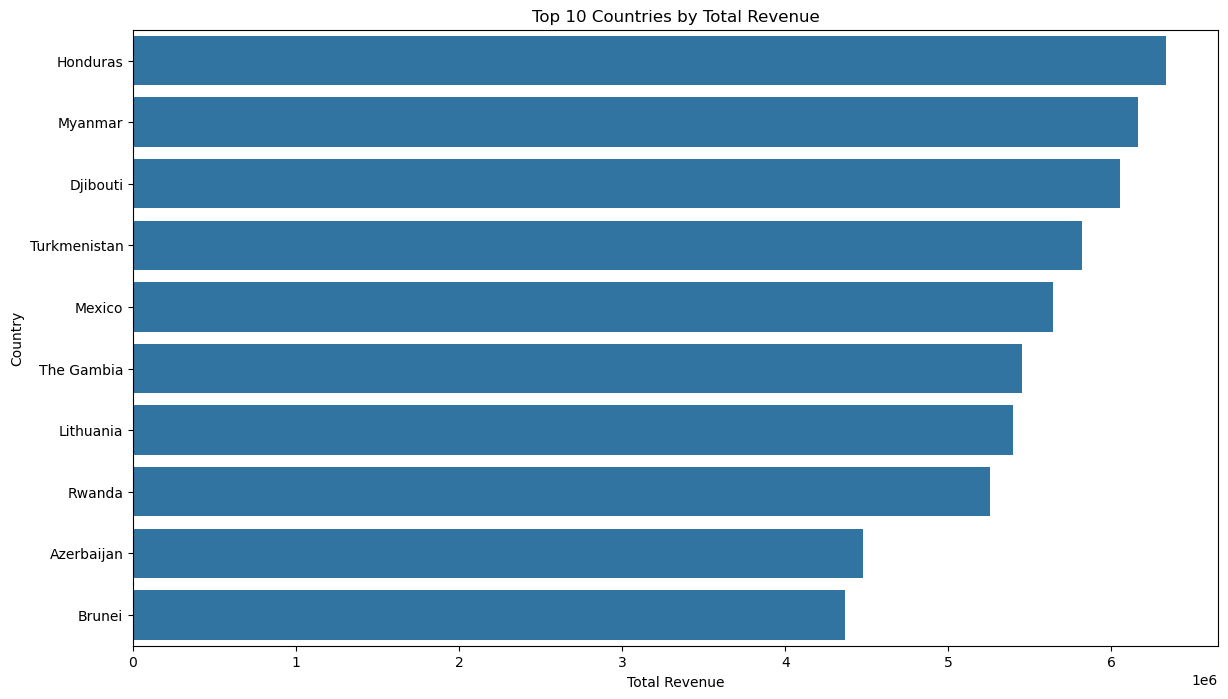

In [13]:
# Group by Country and calculate total revenue
country_sales = df.groupby('Country')['Total Revenue'].sum().reset_index().sort_values(by='Total Revenue', ascending=False)

# Plotting Top 10 Countries by Total Revenue
plt.figure(figsize=(14, 8))
sns.barplot(data=country_sales.head(10), x='Total Revenue', y='Country')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

#### Order Priority Analysis

In [14]:
# Group by Order Priority and calculate total revenue, total cost, and total profit
priority_analysis = df.groupby('Order Priority')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

# Display the result
(priority_analysis)

,Order Priority,Total Revenue,Total Cost,Total Profit
0,C,18855063.05,12106734.59,6748328.46
1,H,48749546.05,31857946.47,16891599.58
2,L,36628127.46,25769399.60,10858727.86
3,M,33116031.75,23446489.25,9669542.50


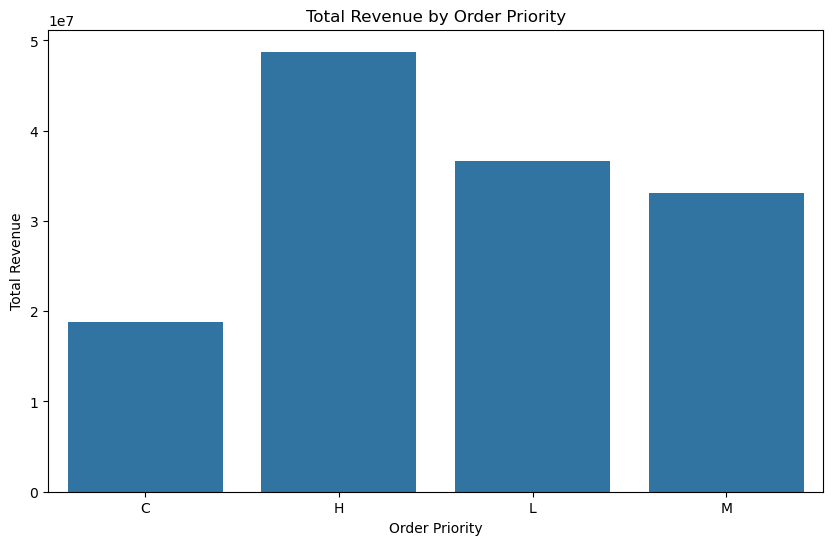

In [15]:
# Group by Order Priority and calculate total revenue, total cost, and total profit
priority_analysis = df.groupby('Order Priority')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

# Plotting Total Revenue by Order Priority
plt.figure(figsize=(10, 6))
sns.barplot(data=priority_analysis, x='Order Priority', y='Total Revenue')
plt.title('Total Revenue by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.show()

#### Monthly Sales Trend

In [16]:
# Extract month and year from Order Date
df['YearMonth'] = df['Order Date'].dt.to_period('M')

# Group by YearMonth and calculate total revenue
monthly_sales_trend = df.groupby('YearMonth')['Total Revenue'].sum().reset_index()

# Display the result
(monthly_sales_trend)

,YearMonth,Total Revenue
0,2010-02,3410661.12
1,2010-05,2587973.26
2,2010-06,1082418.40
3,2010-10,6064933.75
4,2010-11,3458252.00
5,2010-12,2581786.39
6,2011-01,1042225.35
7,2011-02,387002.20
8,2011-04,2798046.49
9,2011-05,272410.45


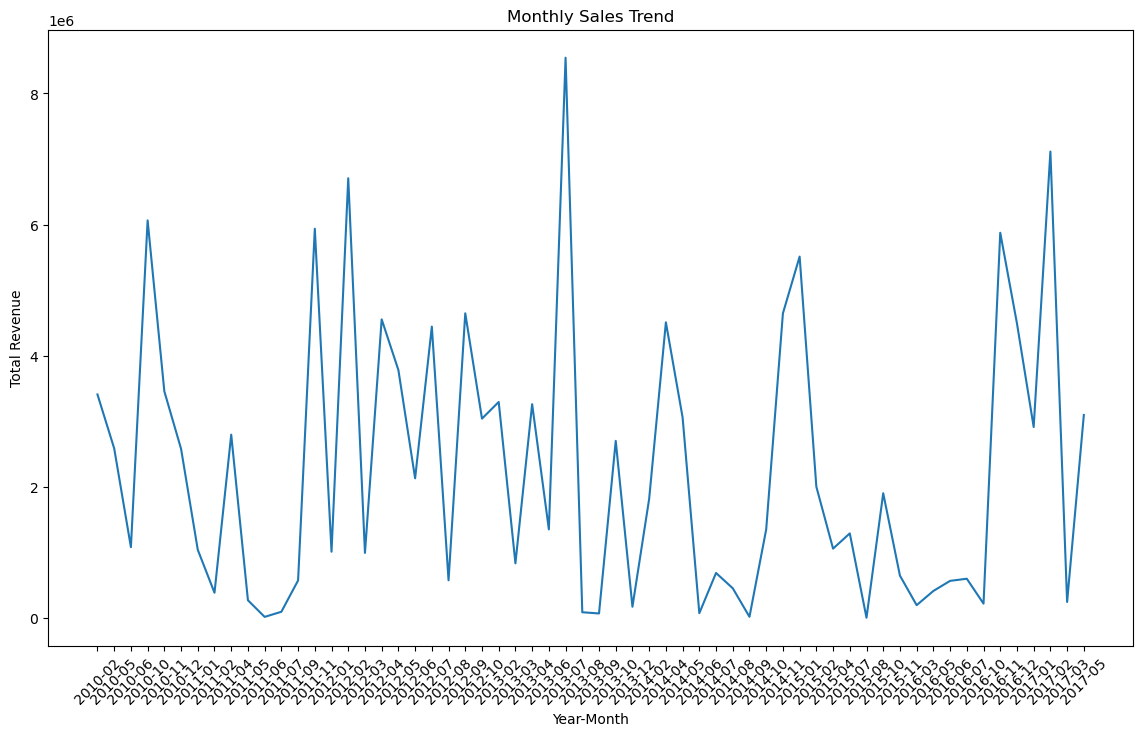

In [27]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract month and year from Order Date
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

# Ensure 'Total Revenue' is numeric
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

# Group by YearMonth and calculate total revenue
monthly_sales_trend = df.groupby('YearMonth')['Total Revenue'].sum().reset_index()

# Plotting Monthly Sales Trend
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales_trend, x='YearMonth', y='Total Revenue')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

#### Correlation Matrix

In [28]:
# Compute the correlation matrix using only numeric columns
numeric_columns = df.select_dtypes(include=[float, int]).columns
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

               Order ID  Units Sold  Unit Price  Unit Cost  Total Revenue  \
Order ID       1.000000   -0.222907   -0.190941  -0.213201      -0.314688   
Units Sold    -0.222907    1.000000   -0.070486  -0.092232       0.447784   
Unit Price    -0.190941   -0.070486    1.000000   0.987270       0.752360   
Unit Cost     -0.213201   -0.092232    0.987270   1.000000       0.715623   
Total Revenue -0.314688    0.447784    0.752360   0.715623       1.000000   
Total Cost    -0.328944    0.374746    0.787905   0.774895       0.983928   
Total Profit  -0.234638    0.564550    0.557365   0.467214       0.897327   
MA_7          -0.148177    0.241937    0.221082   0.208724       0.429823   
MA_30         -0.100044    0.099992   -0.011420  -0.011483       0.062534   
Growth Rate   -0.077237    0.105939    0.090001   0.097796       0.142910   

               Total Cost  Total Profit      MA_7     MA_30  Growth Rate  
Order ID        -0.328944     -0.234638 -0.148177 -0.100044    -0.077237  
Un

#### Heatmap for Correlation

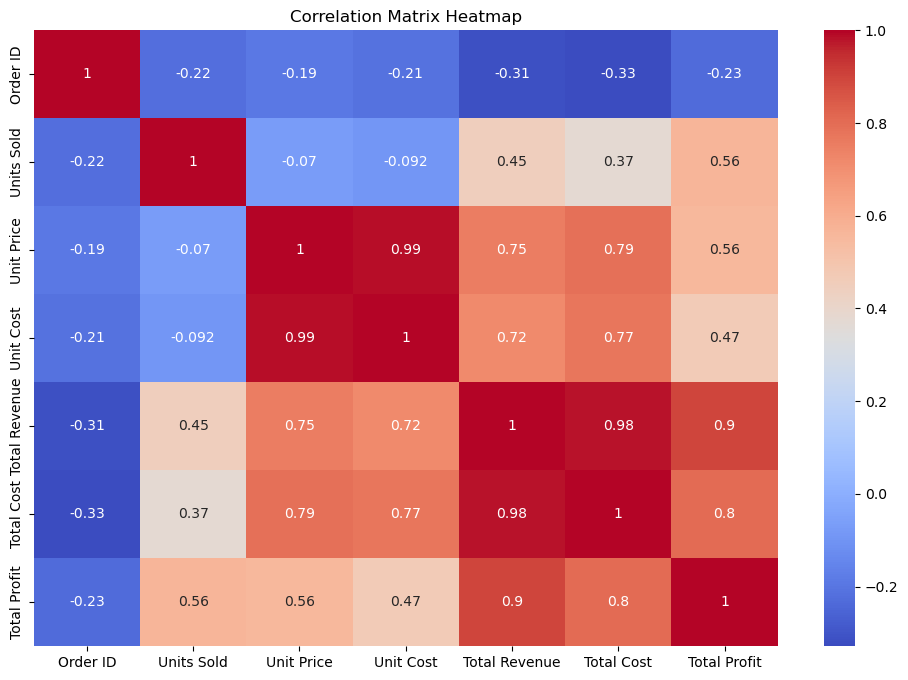

In [76]:
# Plotting heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Distribution of Unit Prices

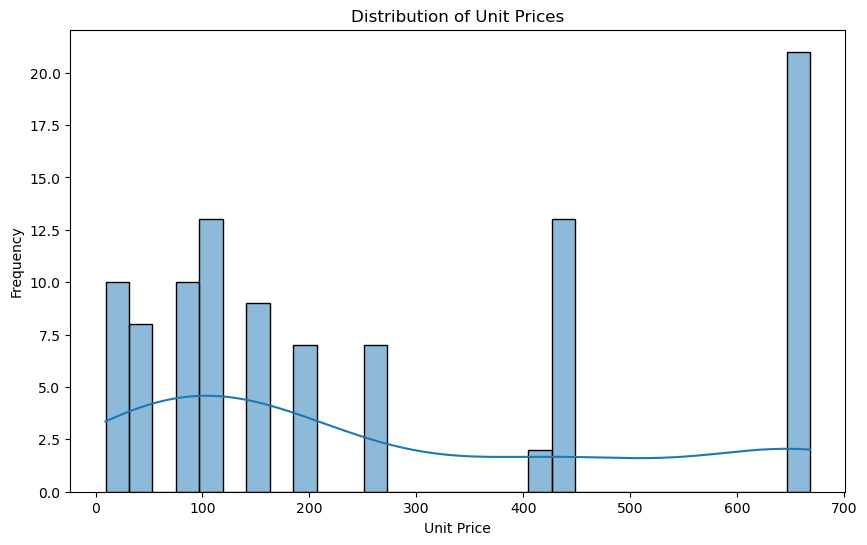

In [30]:
# Plotting distribution of Unit Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Unit Price'], bins=30, kde=True)
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

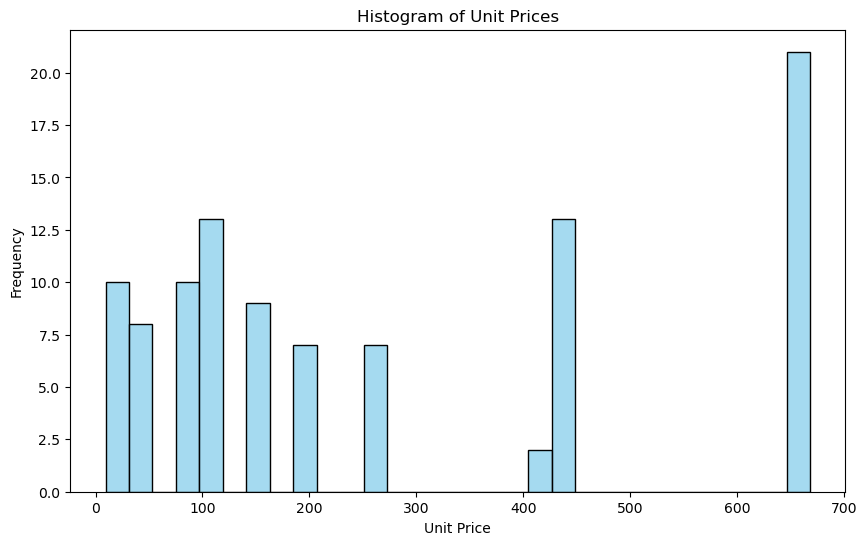

In [41]:
# Plotting Histogram of Unit Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Unit Price'], bins=30, kde=False, color='skyblue')
plt.title('Histogram of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()



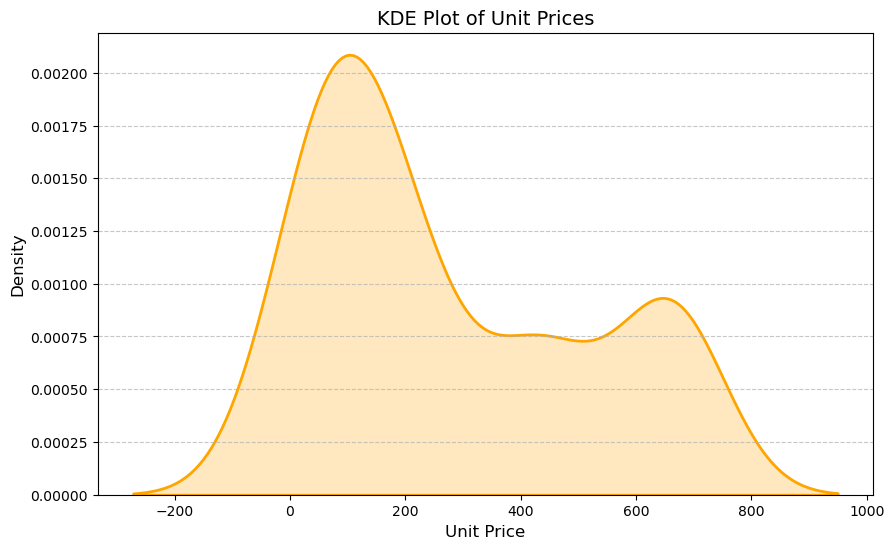

In [32]:
# KDE Plot of Unit Prices
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Unit Price'], fill=True, color='orange', linewidth=2)
plt.title('KDE Plot of Unit Prices', fontsize=14)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


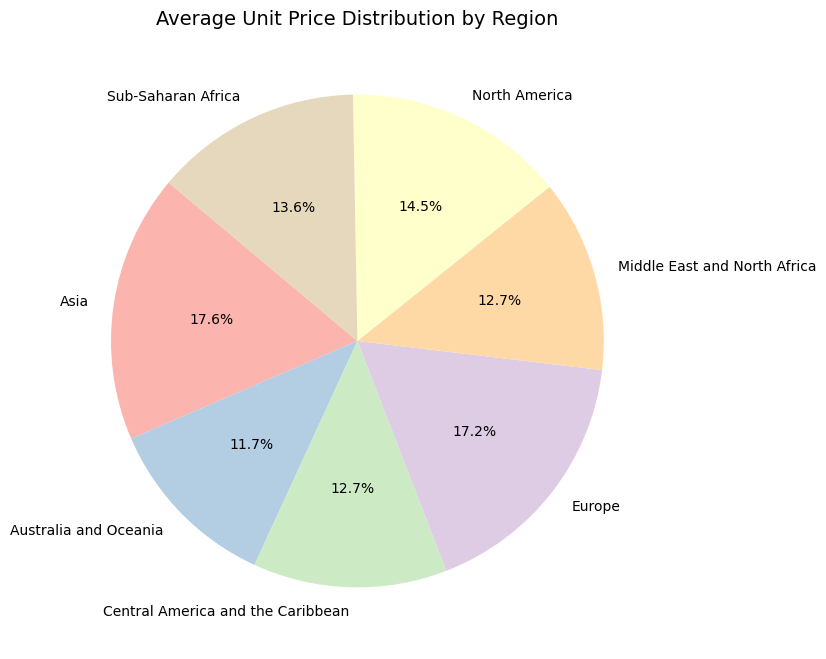

In [44]:
# Pie Chart of Average Unit Price by Region
region_price = df.groupby('Region')['Unit Price'].mean()

plt.figure(figsize=(8, 8))
plt.pie(region_price,
        labels=region_price.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors)
plt.title('Average Unit Price Distribution by Region', fontsize=14)
plt.show()



#### Box Plot of Total Profit by Item Type

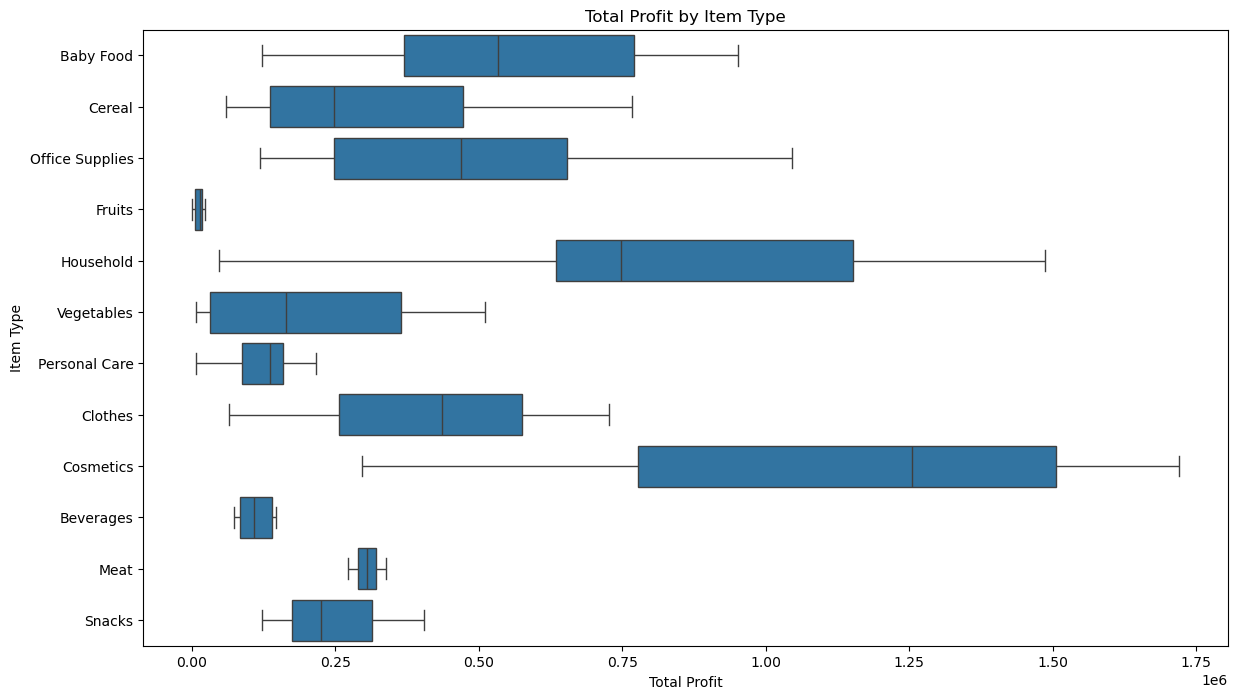

In [33]:
# Plotting box plot of Total Profit by Item Type
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Total Profit', y='Item Type')
plt.title('Total Profit by Item Type')
plt.xlabel('Total Profit')
plt.ylabel('Item Type')
plt.show()

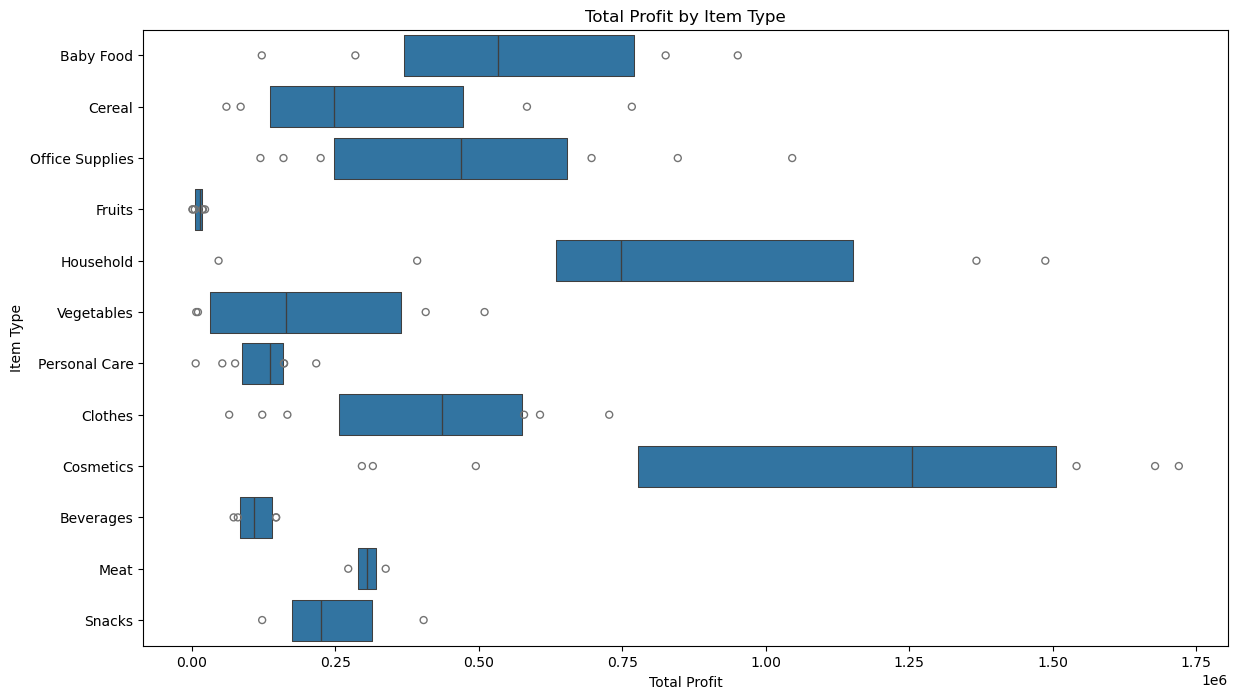

In [34]:
# Plotting box plot of Total Profit by Item Type
plt.figure(figsize=(14, 8))
sns.boxenplot(data=df, x='Total Profit', y='Item Type')
plt.title('Total Profit by Item Type')
plt.xlabel('Total Profit')
plt.ylabel('Item Type')
plt.show()

#### Pairplot for Numerical Features

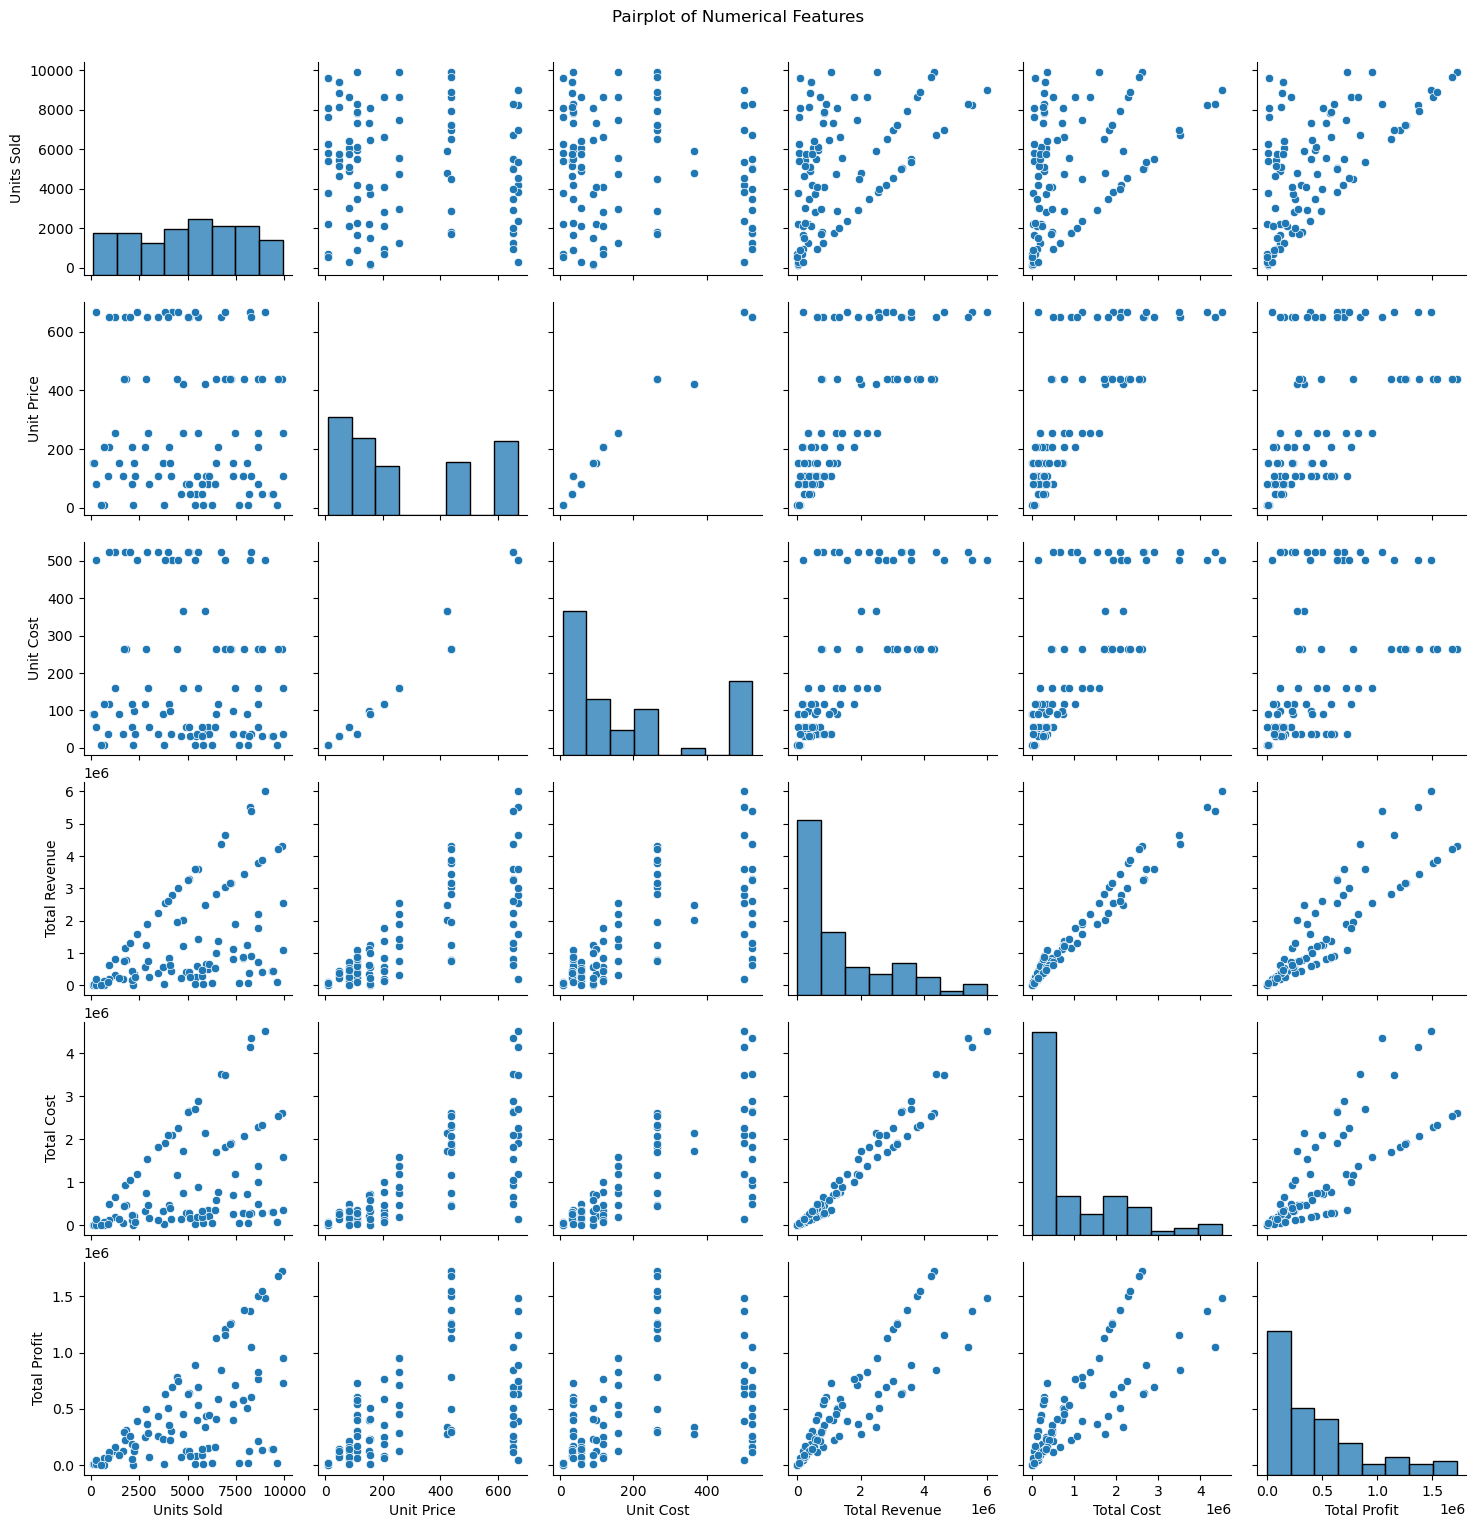

In [36]:
# Selecting numerical features
numerical_features = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']]

# Plotting pairplot for numerical features
sns.pairplot(numerical_features)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

#### Top 10 Products by Total Revenue

C:\Users\pullakandamtejaswini\AppData\Local\Temp\ipykernel_8104\137561326.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Total Revenue', y=correct_product_column_name, palette='viridis')


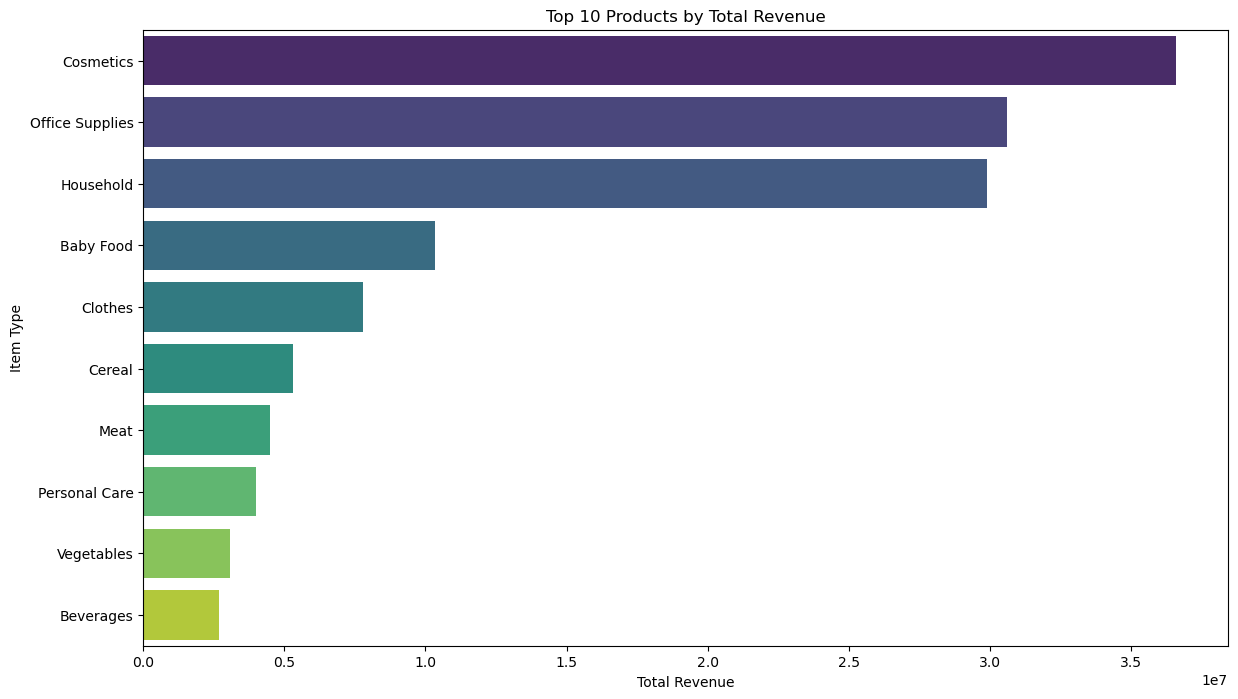

In [37]:
# Assuming the correct column name for product names is 'Product'
correct_product_column_name = 'Item Type' 

# Ensure 'Total Revenue' is numeric
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

# Top 10 Products by Total Revenue
top_products = df.groupby(correct_product_column_name)['Total Revenue'].sum().nlargest(10).reset_index()

# Plotting Top 10 Products by Total Revenue
plt.figure(figsize=(14, 8))
sns.barplot(data=top_products, x='Total Revenue', y=correct_product_column_name, palette='viridis')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel(correct_product_column_name)
plt.show()

#### Sales by Product Category

C:\Users\pullakandamtejaswini\AppData\Local\Temp\ipykernel_8104\3499620871.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_category, x='Total Revenue', y='Item Type', palette='plasma')


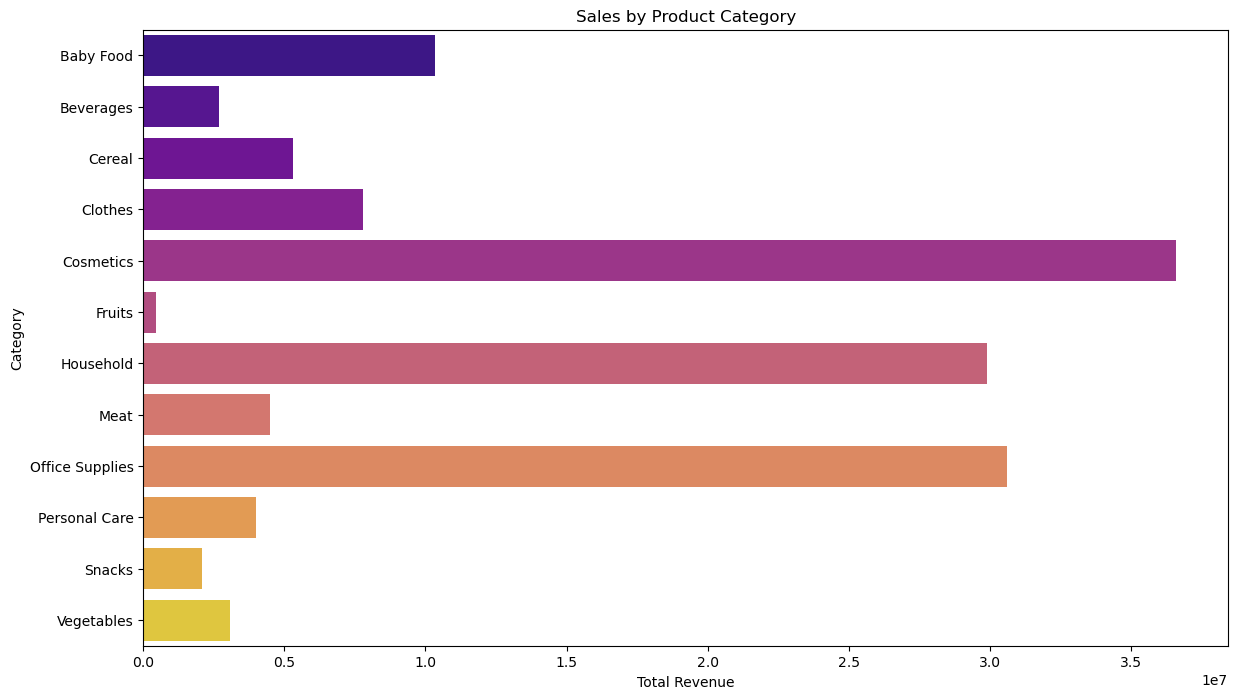

In [38]:
# Sales by Product Category
sales_by_category = df.groupby('Item Type')['Total Revenue'].sum().reset_index()

# Plotting Sales by Product Category
plt.figure(figsize=(14, 8))
sns.barplot(data=sales_by_category, x='Total Revenue', y='Item Type', palette='plasma')
plt.title('Sales by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Category')
plt.show()

#### Advanced Feature Engineering with Visualizations

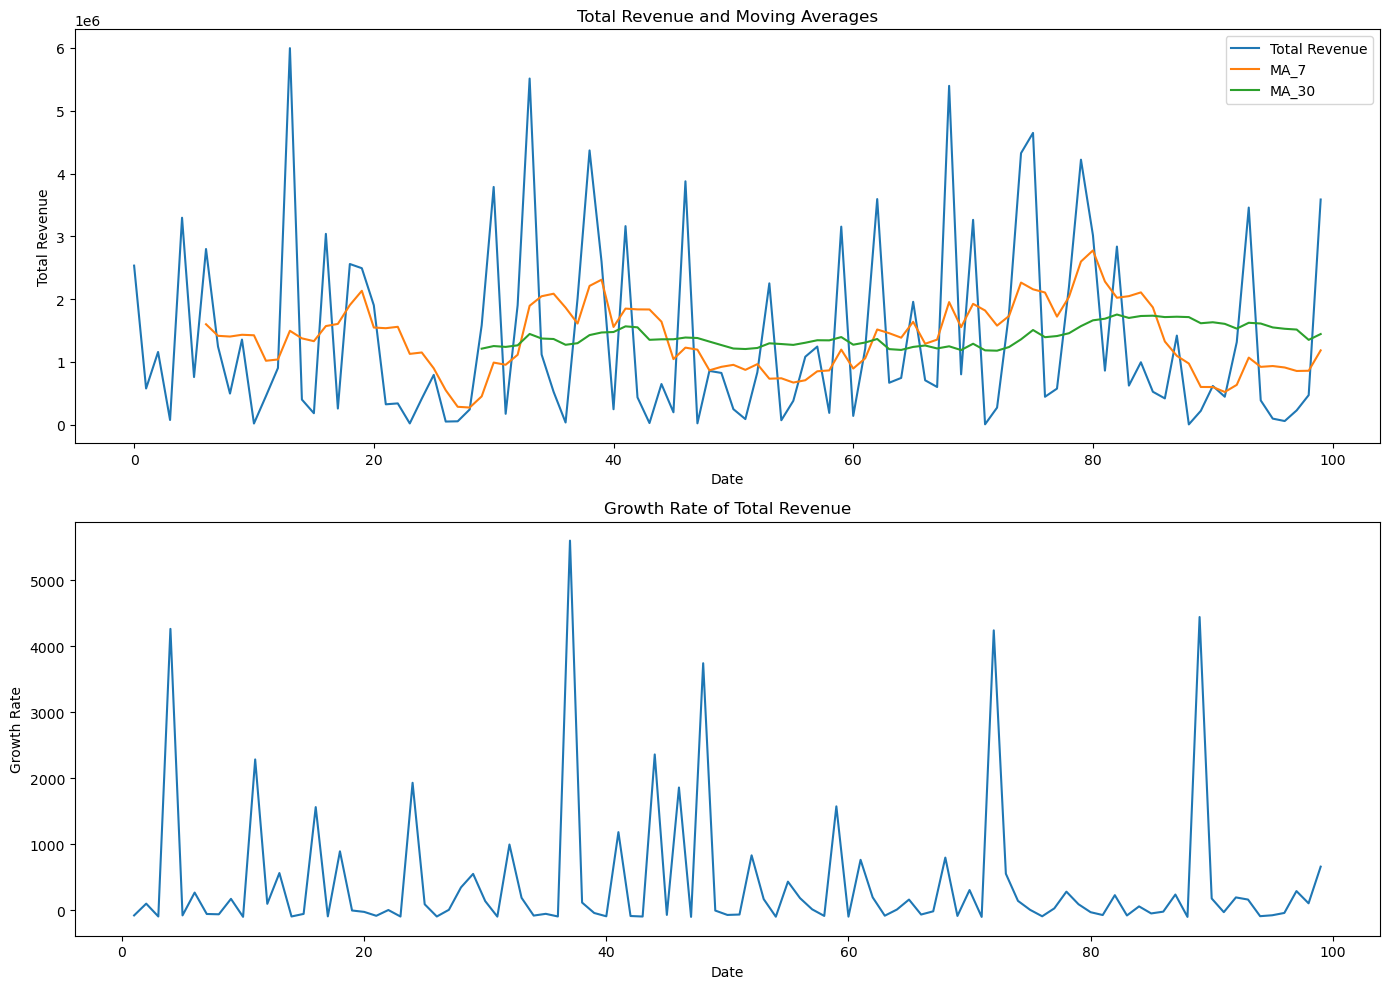

In [39]:
# Calculate the 7-day and 30-day moving averages
df['MA_7'] = df['Total Revenue'].rolling(window=7).mean()
df['MA_30'] = df['Total Revenue'].rolling(window=30).mean()

# Calculate the growth rate if it doesn't exist
# Assuming 'Growth Rate' is the percentage change in 'Total Revenue'
df['Growth Rate'] = df['Total Revenue'].pct_change() * 100

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plot the original total revenue and moving averages
df[['Total Revenue', 'MA_7', 'MA_30']].plot(ax=ax[0])
ax[0].set_title('Total Revenue and Moving Averages')
ax[0].set_ylabel('Total Revenue')
ax[0].set_xlabel('Date')

# Plot the growth rate
df['Growth Rate'].plot(ax=ax[1])
ax[1].set_title('Growth Rate of Total Revenue')
ax[1].set_ylabel('Growth Rate')
ax[1].set_xlabel('Date')

plt.tight_layout()
plt.show()